In [1]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import GRU

In [2]:
# Import the dataset and encode the date
df = pd.read_csv("/Users/salonikhanna/Desktop/FINAL PROJECT/datasets/BTC_USD_2018-10-11_2021-08-11-CoinDesk.csv") 
print(df.Price.shape)

(1035,)


In [3]:
# We will predict the prices for 50 days, so splitting the data accordingly
prediction_days = 50
df_train= df.Price[:len(df.Price)-prediction_days]
df_test= df.Price[len(df.Price)-prediction_days:]

In [4]:
df_test

985     32404.33036
986     33532.25785
987     34718.47493
988     31622.08932
989     31739.29021
990     34213.01274
991     34365.18578
992     35945.78686
993     34855.64451
994     33533.50191
995     33526.85333
996     34404.92706
997     35601.86547
998     34096.89428
999     34047.54762
1000    34206.49453
1001    32579.66788
1002    33994.67699
1003    33543.70184
1004    34382.65069
1005    33032.37773
1006    32544.84491
1007    33003.81292
1008    31783.17135
1009    31596.29438
1010    31640.91813
1011    31537.80519
1012    30940.28728
1013    29608.59725
1014    32014.43603
1015    32203.36564
1016    33117.75146
1017    34014.61836
1018    34574.67066
1019    37114.29662
1020    38963.92286
1021    39917.44937
1022    39810.51797
1023    41157.15483
1024    41869.55251
1025    40263.34476
1026    39412.71647
1027    38368.17401
1028    39831.04391
1029    40902.47558
1030    42608.54498
1031    44095.74449
1032    44294.30730
1033    45990.91007
1034    45576.88888


In [5]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [6]:
# Some preprocessing, like normalizing the values, reshaping, etc. The data is a time series data, so the output to every instance is the next instance. 
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [7]:
# Initialising
regressor2 = Sequential()

# Adding the GRU layer
regressor2.add(GRU(units = 50, activation = 'tanh',return_sequences=True, input_shape = (None, 1)))
#Adding the Dropout layer 
regressor2.add(Dropout(0.28))
regressor2.add(GRU(units = 50, activation = 'tanh',return_sequences=True))
regressor2.add(Dropout(0.28))
regressor2.add(GRU(units = 50, activation = 'relu'))
regressor2.add(Dropout(0.28))

# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the GRU using Adam optimizer and MSE loss
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the GRU to the Training set
regressor2.fit(X_train, y_train, batch_size = 15, epochs = 100)

2021-10-30 10:59:04.687766: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-30 10:59:05.632011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
66/66 [==============================] - 7s 9ms/step - loss: 0.0493
Epoch 2/100
66/66 [==============================] - 1s 9ms/step - loss: 0.0058
Epoch 3/100
66/66 [==============================] - 1s 9ms/step - loss: 0.0043
Epoch 4/100
66/66 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 5/100
66/66 [==============================] - 1s 9ms/step - loss: 0.0033
Epoch 6/100
66/66 [==============================] - 1s 8ms/step - loss: 0.0035
Epoch 7/100
66/66 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 8/100
66/66 [==============================] - 1s 8ms/step - loss: 0.0031
Epoch 9/100
66/66 [==============================] - 1s 10ms/step - loss: 0.0032
Epoch 10/100
66/66 [==============================] - 1s 10ms/step - loss: 0.0037
Epoch 11/100
66/66 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 12/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0030
Epoch 13/100
66/66 [=============

In [8]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))

In [9]:
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
# Prediction from the trained GRU network
predicted_BTC_price = regressor2.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
er2 = np.mean((predicted_BTC_price-test_set)**2)
print("Mean Square Error (MSE) using GRU:", er2)

Mean Square Error (MSE) using GRU: 37409155.40329258


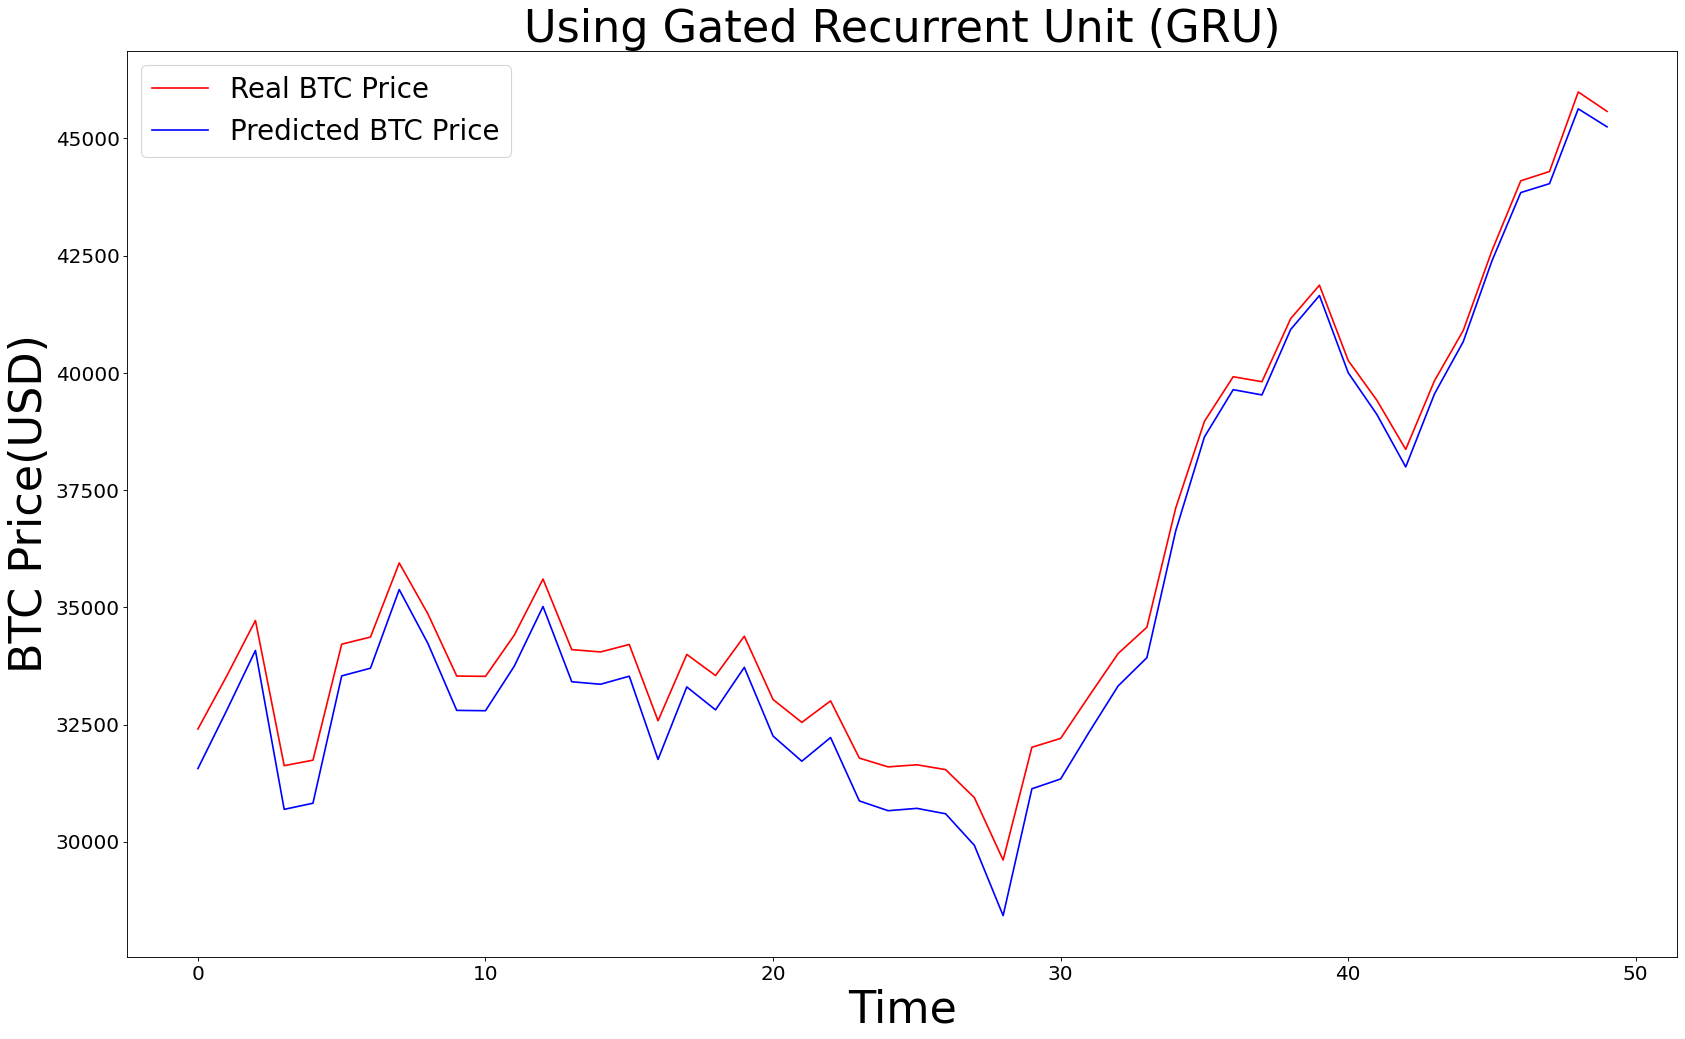

In [10]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('Using Gated Recurrent Unit (GRU)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df['Date']
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [11]:
predicted_BTC_price

array([[31561.34 ],
       [32799.727],
       [34079.29 ],
       [30690.371],
       [30821.486],
       [33536.957],
       [33700.684],
       [35377.887],
       [34225.72 ],
       [32801.082],
       [32793.844],
       [33743.38 ],
       [35016.63 ],
       [33411.758],
       [33358.48 ],
       [33529.938],
       [31755.213],
       [33301.355],
       [32812.184],
       [33719.45 ],
       [32253.469],
       [31716.746],
       [32222.13 ],
       [30870.523],
       [30661.484],
       [30711.45 ],
       [30595.943],
       [29923.316],
       [28424.385],
       [31128.447],
       [31338.516],
       [32347.055],
       [33322.906],
       [33925.44 ],
       [36625.715],
       [38632.684],
       [39641.344],
       [39529.12 ],
       [40925.688],
       [41649.688],
       [40002.793],
       [39109.66 ],
       [37993.45 ],
       [39550.684],
       [40664.36 ],
       [42389.734],
       [43844.71 ],
       [44035.46 ],
       [45631.152],
       [45247.426]],

In [12]:
test_oct=pd.read_csv('/Users/salonikhanna/Desktop/FINAL PROJECT/datasets/BTC_Oct2021.csv')
print(test_oct.Price.shape)

(27,)


In [13]:
test_val = test_oct.Price.values
prices = np.reshape(test_val, (len(test_val), 1))
prices = sc.transform(prices)
prices = np.reshape(prices, (len(prices), 1, 1))
# Prediction from the trained GRU network
predicted_BTC_OCT_price = regressor2.predict(prices)
predicted_BTC_OCT_price = sc.inverse_transform(predicted_BTC_OCT_price)
er2 = np.mean((predicted_BTC_OCT_price-test_val)**2)
print("Mean Square Error (MSE) using GRU:", er2)

Mean Square Error (MSE) using GRU: 45375243.97795539


In [14]:
test_val

array([47856.10043, 48009.07696, 48974.94564, 50165.5875 , 54696.0897 ,
       54171.59329, 54226.39876, 54773.86552, 55256.43145, 57432.14438,
       55798.65086, 56869.28693, 57206.80485, 61703.72718, 60443.6774 ,
       61019.38364, 62090.13705, 63185.91868, 66476.28349, 62910.96133,
       60702.10362, 61132.66642, 60290.48616, 62996.94082, 62383.97483,
       58938.66342, 60950.7054 ])

In [15]:
predicted_BTC_OCT_price

array([[47313.867],
       [47448.516],
       [48286.78 ],
       [49291.758],
       [52825.64 ],
       [52440.22 ],
       [52480.785],
       [52882.26 ],
       [53230.51 ],
       [54734.99 ],
       [53615.504],
       [54356.09 ],
       [54584.152],
       [57376.38 ],
       [56640.13 ],
       [56980.957],
       [57595.004],
       [58196.75 ],
       [59843.27 ],
       [58048.28 ],
       [56794.047],
       [57047.145],
       [56548.18 ],
       [58094.89 ],
       [57759.004],
       [55713.73 ],
       [56940.695]], dtype=float32)

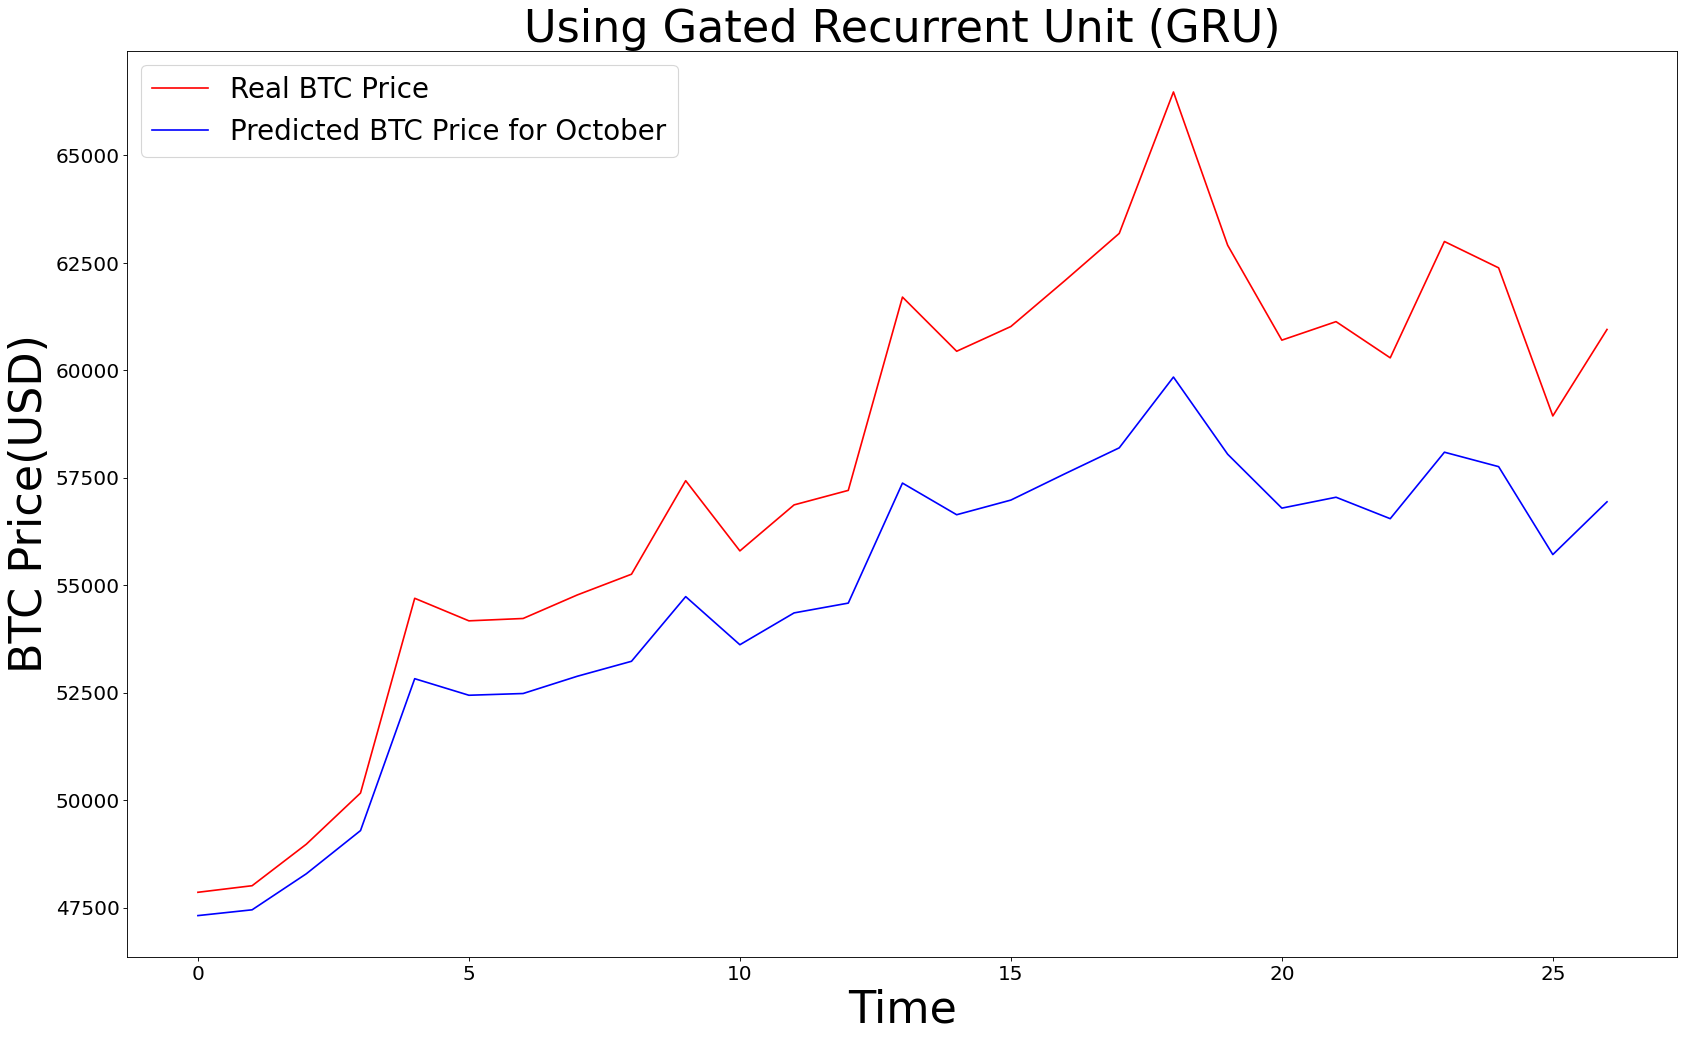

In [16]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_val, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_OCT_price, color = 'blue', label = 'Predicted BTC Price for October')
plt.title('Using Gated Recurrent Unit (GRU)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df['Date']
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()